In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
proj_log_dir = "../data/vehicle_partial_norm_proj_tilde/2/"
reg_log_dir = "../data/vehicle_partial_norm/2/"
limit = 500

In [3]:
proj_rew = []
proj_std = []
reg_rew = []
reg_std = []


with open(proj_log_dir+"log.txt", "r") as f:
    lines = f.readlines()
    for l in lines[1:]:
        proj_rew.append(float(l.split("\t")[2]))
        proj_std.append(float(l.split("\t")[3]))
        if len(proj_rew) >= limit:
            break
        
with open(reg_log_dir+"log.txt", "r") as f:
    lines = f.readlines()
    for l in lines[1:]:
        reg_rew.append(float(l.split("\t")[2]))
        reg_std.append(float(l.split("\t")[3]))
        if len(reg_rew) >= limit:
            break
            

proj_rew = np.array(proj_rew)
proj_std = np.array(proj_std)
reg_rew = np.array(reg_rew)
reg_std = np.array(reg_std)

(-4, 500)

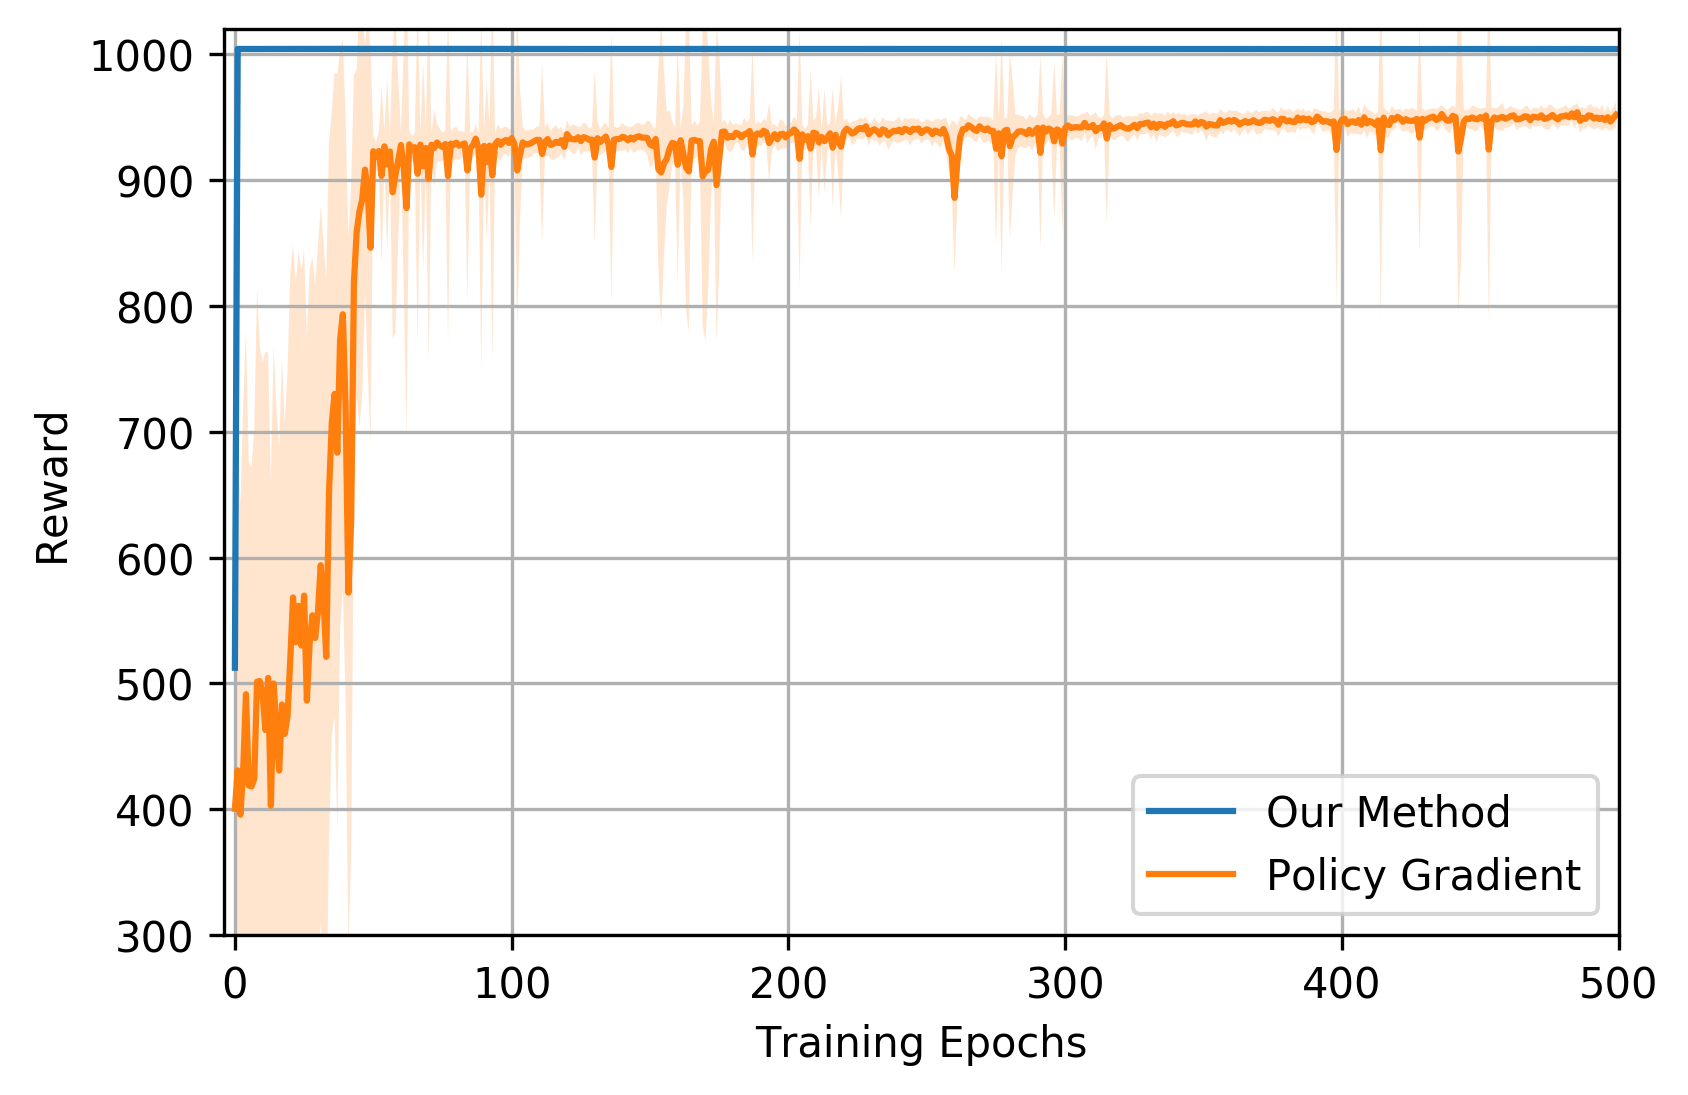

In [4]:
plt.figure(dpi=300)
plt.xlabel("Training Epochs")
plt.ylabel("Reward")
plt.plot(proj_rew, label="Our Method")
plt.plot(reg_rew, label="Policy Gradient")
plt.fill_between(np.arange(len(proj_std)), proj_rew-proj_std, proj_rew+proj_std, alpha=0.2)
plt.fill_between(np.arange(len(reg_std)), reg_rew-reg_std, reg_rew+reg_std, alpha=0.2)
plt.legend()
plt.grid()
plt.ylim(300,1020)
plt.xlim(-4,limit)